In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageDraw,ImageFont
import numpy as np

import warnings
warnings.filterwarnings('ignore')

image_dir = "data/pics"

# Face Shape Classifier For Hairstyle Recommendation

With this project, I will attempt to address the challenge by developing a hairstyle recommendation system that identifies the user’s face shape and recommends the most flattering hair style. My approach will be to first build a facial classifier that will determine whether the user’s face is long, round, oval, heart- or square-shaped.  Based on the classification, the model will recommend appealing hairstyles. The recommendation system will continually update utilizing user input on their most and least desired hair styles.  

Initially, I am focusing on women's faces and hair styles, although this concept applies to men too.  Face shape is often used to help women determine how to style their hair, choose their eye glasses and apply their make up.  Face shape detection is subjective and this project attempts to provide a more quantitative approach.
Below are the examples of each five main face shapes:

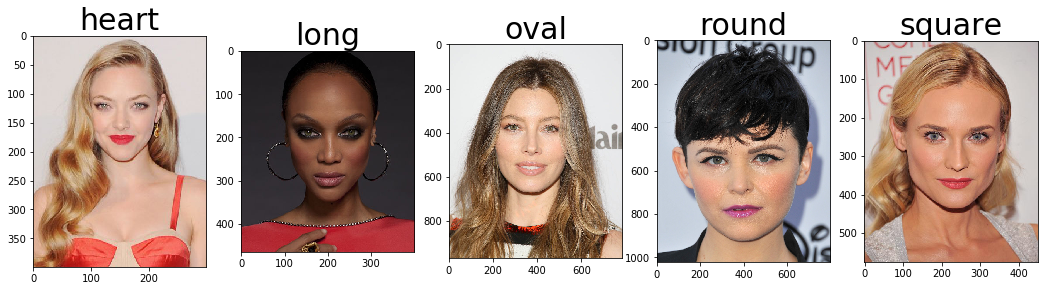

In [2]:
plt.figure(figsize = (18,18))

examples = ['data/pics/heart/amanda seyfried 10.jpg',
            'data/pics/long/Tyra Banks (4).jpg',
            'data/pics/oval/Jessica Biel (20).jpg',
            'data/pics/round/Ginnifer Goodwin (35).jpg',
            'data/pics/square/Diane Kruger (1).jpg']

names = ['heart','long','oval','round','square']
            
for i in range(0,len(examples)):
    plt.subplot(2,5,i+1)
    img = Image.open(examples[i])
    draw = ImageDraw.Draw(img)
    plt.imshow(img)
    plt.title(names[i],fontsize= 30)
    img.close()

As you can observe that the face shape do differ in structure in various ways:

1. The heart-shaped face is characterized by wider cheekbones that tapers down to a narrow chin.
2. The long face is, well, long and very narrow.
3. The oval face is similar to the long face but fuller than the long face.
4. The round face is distinct, it's a much shorter and wider shape.
5. The square-shape face is charcterized by a strong jaw.

# Dataset Collection

In order to develop a set of images labeled with the correct face shape, I turned to the experts in the fashion and style industry. I reviewed 22 websites and 234 celebrities.  Of these, 33 celebrities had a unanimous classification from 3 or more sites (65 from 2 or more). 49 other celebrities had one or two conflicting classifications but had strong consensus towards a face shape with which I could use to classify.  As a result, 74 celebrities were utilized in the analysis.  There were ~160 celebrities I did not include as they either had too few citations or several conflicts. More labeled data would be ideal and would be an area of future enhancement.

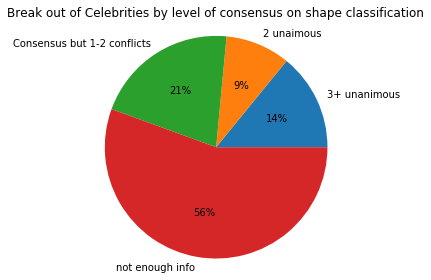

In [3]:
celeb_count = [33,22,49,130]
labels = ['3+ unanimous','2 unaimous','Consensus but 1-2 conflicts','not enough info']
patches = plt.pie(celeb_count, labels = labels,autopct='%1.f%%')
plt.axis('equal')
plt.title('Break out of Celebrities by level of consensus on shape classification')
plt.tight_layout()
plt.show()

Of the five face shapes, square faced celebrities were the most agreed upon, with 74% of those celebrities having a unanimous consensus on their shape. Round was second highest at 70%.  

Because the classification of face shape is subjective, this will impact the potential accuracy of the model, however, this model attempts to develop an approach to resolving conflict over face shape and providing more stringent guidelines on the definitions.  

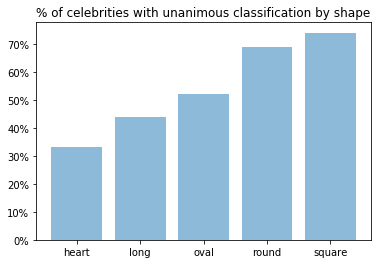

In [4]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots()
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.yaxis.set_major_formatter(formatter)


percent_unanim = [33,44,52,69,74]
shapes = ['heart','long','oval','round','square']
y_pos = np.arange(len(shapes))

plt.bar(y_pos, percent_unanim, align='center', alpha=0.5)
plt.xticks(y_pos, shapes)
plt.title('% of celebrities with unanimous classification by shape')
 
plt.show()

Square faces have the most consensus which allowed for me to use the most celebrities with square faces.  

The images utilized for this project are available in the DATA folder on my github. My dataset consisted of ~1500 images for 74 celebrities.

The two pie charts below provide a breakdown of the % of images by face shape and the % of celebrities with each face shape in my dataset. You can see that the face shapes were similarly represented in the dataset. 

NameError: name 'data' is not defined

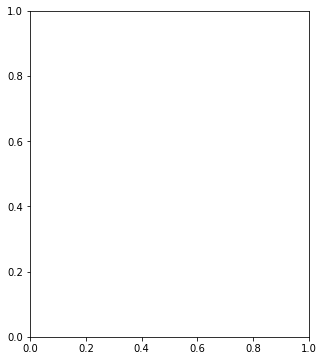

In [5]:
plt.figure(figsize=(11,6)) 
plt.subplot(1,2,1)
shape_count = data.groupby('classified_shape').count()['0']
labels = shape_count.index
patches = plt.pie(shape_count,autopct='%1.f%%', labels = labels)
plt.axis('equal')
plt.title('% of Images by shape')
plt.tight_layout()

plt.subplot(1,2,2)
celebritites_by_shape = [14,14,14,13,19]
labels = ['heart','long','oval','round','square']

patches = plt.pie(celebritites_by_shape,autopct='%1.f%%', labels = labels)
plt.axis('equal')
plt.title('% of Celebrities by shape')
plt.tight_layout()
plt.show()

# Processing Images

An extraordinary amount of work has been done around computer vision such that a library called `face_recognition` exists to locate the features of a human face.  This library was built using dlib’s state-of-the-art face recognition built with deep learning. 

### Feature Extraction

Below is a map of the facial feature map which generates 68 unique points.

<img src="face_points.jpg" alt="face_points" style="width: 600px;"/>

Note that the face_recognition package does not provide a top point of the head, so on the basis of a few observations, I determined the half-way point on the face is point 29, so I used double the distance between the chin and point 29 to determine face height. Another available method would be to use the change color (from skin to hair) as the top of the face, however, this would require that the photos not have any bangs and may not work for all skin/hair color combinations. 

From these face points, I developed 23 additional features.  For the first 16 features, I calculated the angles between the chin point (point 9) and each of the jaw line points (1-8, 10-17).  Additionally, I added face width (the distance from point 1 to point 17), face height (described above), the ratio between them, the jaw width (distance between points 7 and 11), the jaw width to face width ratio, the mid-jaw width (distance between points 5 and 13), and the mid-jaw width to jaw width ratio.

### Processing

In order to process over 1500 images, I developed a function that processes through the folders that I created in the data collection stage. It utilizes the folder name to hold the classification. This allows for future and on-going development.  Additional celebrities, images and face shapes could be added to this process without the need for updating the functions.

All of these points and features are then placed into a dataframe to start analyzing with various models.

In [6]:
df = pd.DataFrame(columns = ['0','1','2','3','4','5','6','7','8','9','10','11',	'12',	'13',	'14',	'15',	'16','17',
                             '18',	'19',	'20',	'21',	'22',	'23',	'24','25',	'26',	'27',	'28',	'29',
                             '30',	'31',	'32',	'33',	'34',	'35',	'36',	'37',	'38',	'39',	'40',	'41',
                             '42',	'43',	'44',	'45',	'46',	'47',	'48',	'49',	'50',	'51',	'52',	'53',
                             '54',	'55',	'56',	'57',	'58',	'59',	'60',	'61',	'62',	'63',	'64',	'65',
                             '66',	'67',	'68',	'69',	'70',	'71',	'72',	'73',	'74',	'75',	'76',	'77',
                             '78',	'79',	'80',	'81',	'82',	'83',	'84',	'85',	'86',	'87',	'88',	'89',
                             '90',	'91',	'92',	'93',	'94',	'95',	'96',	'97',	'98',	'99',	'100',	'101',
                             '102',	'103',	'104',	'105',	'106',	'107',	'108',	'109',	'110',	'111',	'112',	'113',
                             '114',	'115',	'116',	'117',	'118',	'119',	'120',	'121',	'122',	'123',	'124',	'125',
                             '126',	'127',	'128',	'129',	'130',	'131',	'132',	'133',	'134',	'135',	'136',	'137',
                             '138',	'139',	'140',	'141',	'142',	'143','A1','A2','A3','A4','A5','A6','A7','A8','A9',
                            'A10','A11','A12','A13','A14','A15','A16','Width','Height','H_W_Ratio','Jaw_width','J_F_Ratio',
                             'MJ_width','MJ_J_width'])

In [8]:
%run -i functions_only.py    # This calls my main functions (make_face_df, Distance, ScaleRotateTranslate)

In [9]:
%run -i functions_only_save.py    # This calls my 2nd function for Recommendation Purpose

The code below will run the main function on all of the photos in the above directory. This creates a neat dataset that contains the 68 coordinates for face landmarks, the calculated lengths and ratios and matches that with the image name and classified shape.

In [11]:
# You can only use this code if Dataframe file (all_features.csv) is not available.
# make df to store name of shape
      
data = pd.DataFrame()
data.reset_index
shape_df = pd.DataFrame(columns = ['filenum','filename','classified_shape'])
shape_array = []
def store_features_and_classification():
    filenum = -1
    sub_dir = [q for q in pathlib.Path(image_dir).iterdir() if q.is_dir()]
    start_j = 0
    end_j = len(sub_dir)

    for j in range(start_j, end_j):
        images_dir = [p for p in pathlib.Path(sub_dir[j]).iterdir() if p.is_file()]

        for p in pathlib.Path(sub_dir[j]).iterdir():
#             print(p)

            shape_array= []
            if 1 == 1:
                    face_file_name = os.path.basename(p)
                    classified_face_shape = os.path.basename(os.path.dirname(p)) 
                    filenum += 1
                    make_face_df(p,filenum)
                    shape_array.append(filenum)
                    shape_array.append(face_file_name)  
                    shape_array.append(classified_face_shape)
                    shape_df.loc[filenum] = np.array(shape_array)
            
            
store_features_and_classification()  
data = pd.concat([df, shape_df], axis=1)

data\pics\heart\Amanda S 2.jpg
data\pics\heart\Amanda S 2.jpg_NEW_cropped.jpg
data\pics\heart\Amanda S 2.jpg_NEW_cropped.jpg_NEW_cropped.jpg
data\pics\heart\Amanda S 2.jpg_NEW_cropped.jpg_NEW_rotated_pts.jpg
data\pics\heart\Amanda S 2.jpg_NEW_rotated_pts.jpg
data\pics\heart\Amanda S 2.jpg_NEW_rotated_pts.jpg_NEW_cropped.jpg
data\pics\heart\Amanda S 2.jpg_NEW_rotated_pts.jpg_NEW_rotated_pts.jpg
data\pics\heart\amanda seyfried 10.jpg
data\pics\heart\amanda seyfried 10.jpg_NEW_cropped.jpg
data\pics\heart\amanda seyfried 10.jpg_NEW_cropped.jpg_NEW_cropped.jpg
data\pics\heart\amanda seyfried 10.jpg_NEW_cropped.jpg_NEW_rotated_pts.jpg
data\pics\heart\amanda seyfried 10.jpg_NEW_rotated_pts.jpg
data\pics\heart\amanda seyfried 10.jpg_NEW_rotated_pts.jpg_NEW_cropped.jpg
data\pics\heart\amanda seyfried 10.jpg_NEW_rotated_pts.jpg_NEW_rotated_pts.jpg
data\pics\heart\amanda seyfried 11.jpg
data\pics\heart\amanda seyfried 11.jpg_NEW_cropped.jpg
data\pics\heart\amanda seyfried 11.jpg_NEW_cropped.jpg_N

KeyboardInterrupt: 

In [12]:
# Add all the faces features with shape to a DATA CSV file for model purpose.
data.to_csv('all_features.csv')

In [ ]:
# You can use this only if the data is already in a DF so you don't have to keep running it over and over:

In [14]:
# load data file
# start here
data = pd.read_csv('all_features.csv',index_col = None)
data = data.drop('Unnamed: 0',axis = 1)
data.shape

(1524, 170)

# Data Visualizations

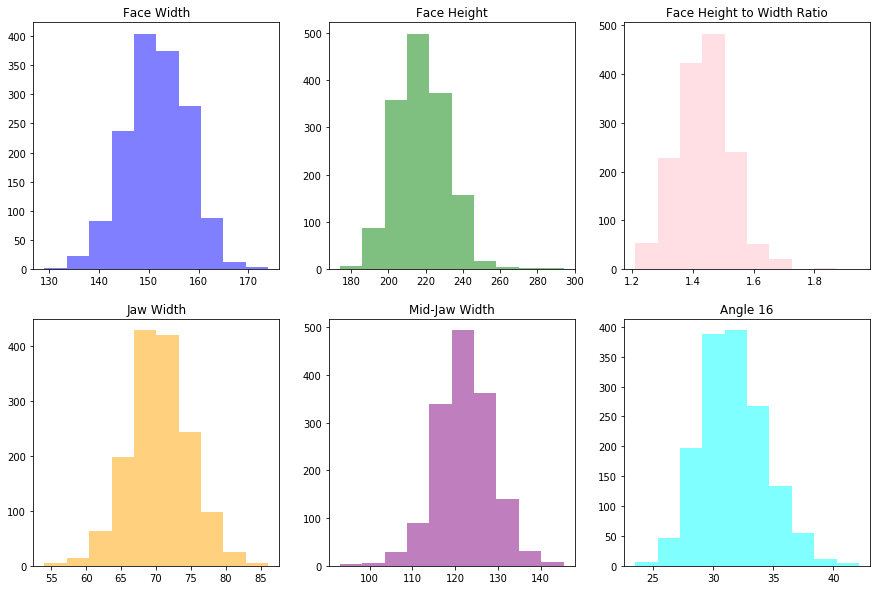

In [7]:
xclean = data.dropna(axis=0, how='any')
plt.figure(figsize=(15,10)) 

plt.subplot(2,3,1)
plt.hist(xclean['Width'], 10, facecolor='blue', alpha=0.5)
plt.title('Face Width')

plt.subplot(2,3,2)
plt.hist(xclean['Height'], 10, facecolor='green', alpha=0.5)
plt.title('Face Height')

plt.subplot(2,3,3)
plt.hist(xclean['H_W_Ratio'], 10, facecolor='pink', alpha=0.5)
plt.title('Face Height to Width Ratio')

plt.subplot(2,3,4)
plt.hist(xclean['Jaw_width'], 10, facecolor='orange', alpha=0.5)
plt.title('Jaw Width')

plt.subplot(2,3,5)
plt.hist(xclean['MJ_width'], 10, facecolor='purple', alpha=0.5)
plt.title('Mid-Jaw Width')

plt.subplot(2,3,6)
plt.hist(xclean['A16'], 10, facecolor='aqua', alpha=0.5)
plt.title('Angle 16')

plt.show()

The attributes here appear to be normally distributed. Now I want to look at the distribution by face shape and what may make them different.

In [8]:
from scipy import stats

S1 = []
S2 = []
S1S2 = []
p_value = []
t_tests = pd.DataFrame() 
labels = ['heart','long','oval','round','square']
for i in range(0,4):
    for j in range(0,4):
        t = (stats.ttest_ind(xclean[xclean.classified_shape == labels[i] ].Width, xclean[xclean.classified_shape == labels[j+1]].Width))
        p_value.append(t.pvalue)
        S1.append(labels[i])
        S2.append(labels[j+1])   
t_tests['S1'] = S1
t_tests['S2'] = S2
t_tests["test"] = t_tests["S1"].map(str) + ':' + t_tests["S2"]
t_tests['p_value'] = p_value

t_tests = t_tests[t_tests.S1 != t_tests.S2]

In [9]:
def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'green' if val < 0.05 else 'black'
    return 'color: %s' % color

s = t_tests.style.applymap(color_negative_red,subset=pd.IndexSlice[:, ['p_value']])
s

,S1,S2,test,p_value
0,heart,long,heart:long,0.000710122
1,heart,oval,heart:oval,0.318952
2,heart,round,heart:round,6.75319e-07
3,heart,square,heart:square,0.316319
5,long,oval,long:oval,9.36922e-06
6,long,round,long:round,1.14971e-16
7,long,square,long:square,0.0179759
8,oval,long,oval:long,9.36922e-06
10,oval,round,oval:round,3.91115e-05
11,oval,square,oval:square,0.0394629


Based on these t-test p-values, we can reject the null hypothesis for the pairs in green font (using p < 0.05):

1. Heart & Long faces
2. Heart & Round faces
3. Long & Oval faces
4. Long & Round faces
5. Long & Square faces
6. Oval & Round faces
7. Oval & Square faces
8. Round & Square faces

We cannot reject the null hypothesis for Heart & Oval (p value = 0.32) and Heart & Square (p value = 0.31)

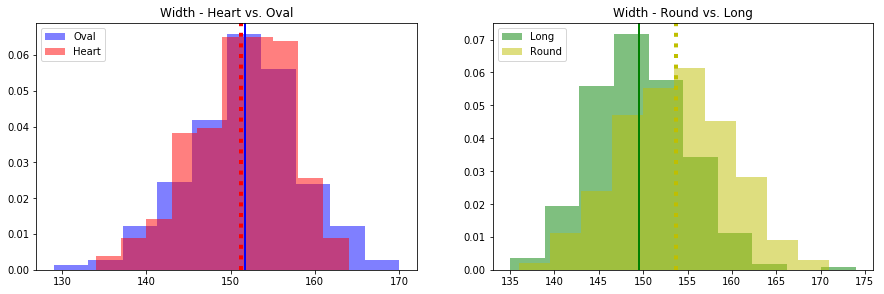

In [10]:

# Face width histograms; purposely normed because of varying sample sizes.

HW = xclean[xclean['classified_shape']=="heart"] 
OW = xclean[xclean['classified_shape']=="oval"] 
LW = xclean[xclean['classified_shape']=="long"] 
RW = xclean[xclean['classified_shape']=="round"] 

plt.figure(figsize=(15,10)) 

plt.subplot(2,2,1)
plt.hist(OW['Width'],label = 'Oval',alpha = 0.5, color = 'b',normed = True)
plt.hist(HW['Width'],label = 'Heart',alpha = 0.5, color = 'r',normed = True)
plt.axvline(OW['Width'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(HW['Width'].mean(), color='r', linestyle='dotted', linewidth=4)
plt.title('Width - Heart vs. Oval')
plt.legend(loc='upper left')

plt.subplot(2,2,2)
plt.hist(LW['Width'],label = 'Long',alpha = 0.5, color = 'g',normed = True)
plt.hist(RW['Width'],label = 'Round',alpha = 0.5, color = 'y',normed = True)
plt.axvline(LW['Width'].mean(), color='g', linestyle='solid', linewidth=2)
plt.axvline(RW['Width'].mean(), color='y', linestyle='dotted', linewidth=4)
plt.legend(loc='upper left')
plt.title('Width - Round vs. Long')

plt.show()

In the first graph where the p >= 0.05, you can see how close the means are for oval- and heart-shaped faces' width and their distributions overlap significantly. On the right hand, the width for long and round faces are signficantly different and the mean for round is much higher and the entire distribution is shifted towards wider face dimensions.

### Box Plots

To visualize all of these comparisons for several metrics would be pretty cluttered, therfore box plots allow you to quickly review the distributions, means and medians for key features from the dataset.

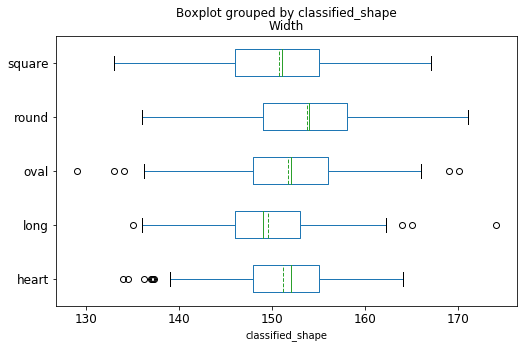

In [11]:
data.boxplot(column='Width', by='classified_shape',vert=False, ax=None, fontsize=12, rot=0, grid=False, figsize=(8,5), 
             meanline = True, showmeans = True,
                  layout=None, return_type=None)
plt.show()

Above, you will observe a graph that provides the median (solid line), mean (dotted), quartiles and range of the facial widths by facial shape.  As expected, round faces have the largest facial width median, mean and max. Long faces are characterized by having the most narrow face. Just like the histogram above demonstrates, heart & oval are very similar while long and round are the most different.

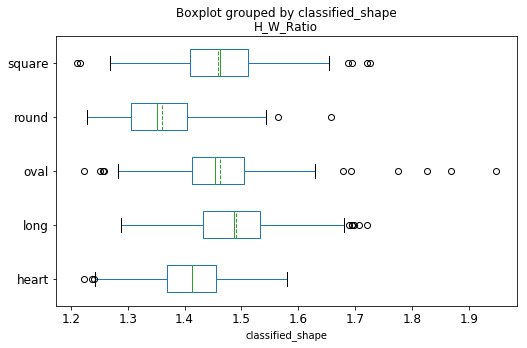

In [12]:
# H_W_Ratio

data.boxplot(column='H_W_Ratio', by='classified_shape',vert=False, ax=None, fontsize=12, rot=0, grid=False, figsize=(8,5), 
                  layout=None, return_type=None, meanline = True, showmeans = True)
plt.show()

The box plot above illustrates the face height to width ratio.  The round face shape has the lowest height to width ratio which aligns with expectations. The oval face has the most variability for the height to width ratio attribute.

For width, the heart and oval were very similar, but you can see that for the ratio of height to width, the heart- and oval-shaped faces begin to differentiate.  Oval-shaped faces have a higher height to width ratio than heart (i.e., they are longer than heart-shaped faces).

Based on my observation, face shapes really begin to vary near the mouth/chin.  Therefore, I calculated two new features regarding the width of the jaw at different locations.
The Jaw Width is defined as the distance between points 7 and 11. The Mid-jaw width is defined as the distance between the 5 and 13 points. I then calculated the ratio of those two widths.

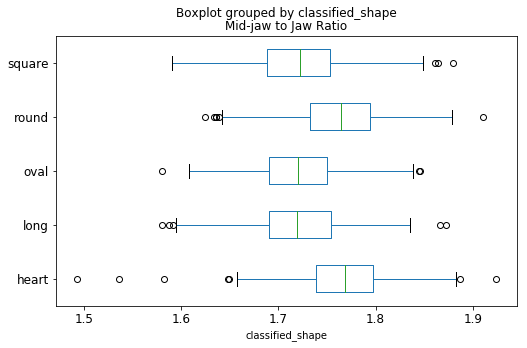

In [13]:
data.boxplot(column='MJ_J_width', by='classified_shape',vert=False, ax=None, fontsize=12, rot=0, grid=False, figsize=(8,5), 
                  layout=None, return_type=None)
plt.title('Mid-jaw to Jaw Ratio')
plt.show()

This ratio allows us to observe the narrowing between the mid jaw and jaw for the heart shaped faces, evidenced by the higher ratio.  Once again, you can see that heart and oval differ.  Heart-shaped faces are characterized by narrow chins which means that the mid-jaw to jaw ratio is higher (i.e., the mid-jaw is proportionally larger vs. the lower jaw/chin area). 

In [16]:
!pip install opencv-python

## Face Overlays

The following images illustrate how the crop/align/rotate process allows for the faces to be very consistent in their position within the frame. As observed, the photos were taken by all different photographers, at different times and from multiple positions.  Without this step to standardize, there was a lot more noise in the derived and calculated  features.  The first 5 images are all of the pictures of the same celebrity and 6th image is all of the square-shaped face celebrities.  

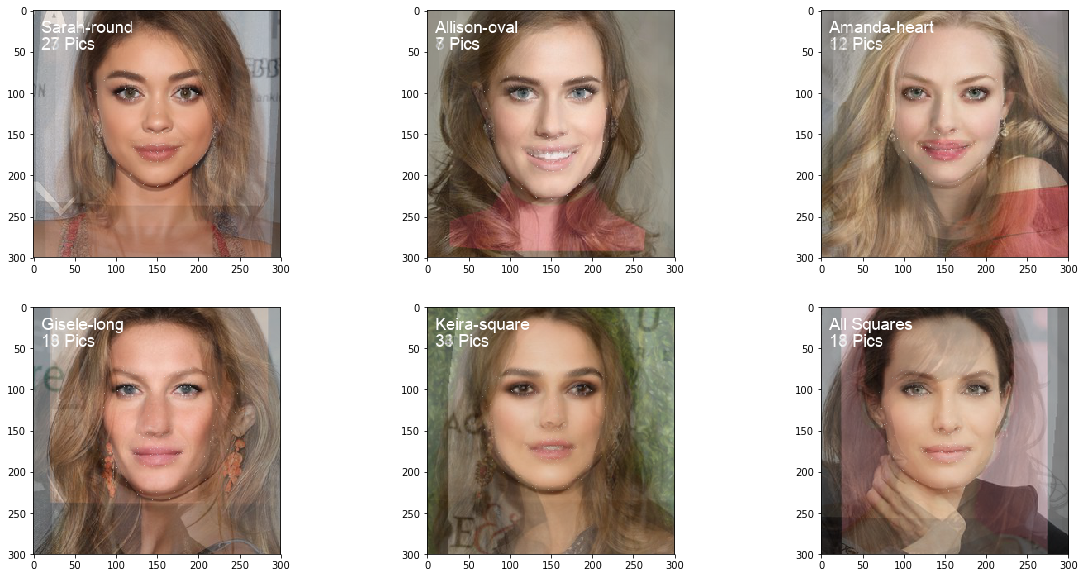

In [14]:
%run -i plot_images.py

# Evaluate models

## Modeling Pipeline

Firstly, I started to build my model with capturing the data as described above, then I scaled the data by removing the mean and scaling to unit variance.  This is performed so that each feature contributes approximately proportionately to the model. I attempted to extract features using PCA but that process did not significantly improve the speed and/or results of my models. Although PCA was able to slightly improve overfitting.

The scaled inputs were split into train/test and then proessed through the models below.

## Model Comparisons

Below, I have outlined all of the models I attempted.  Refer to the notebook below for the modeling implementation and validation.  Below the graph, I've discussed the reasons I attempted these models, the hyperparameters I chose as well as the decision support to use my selected model.

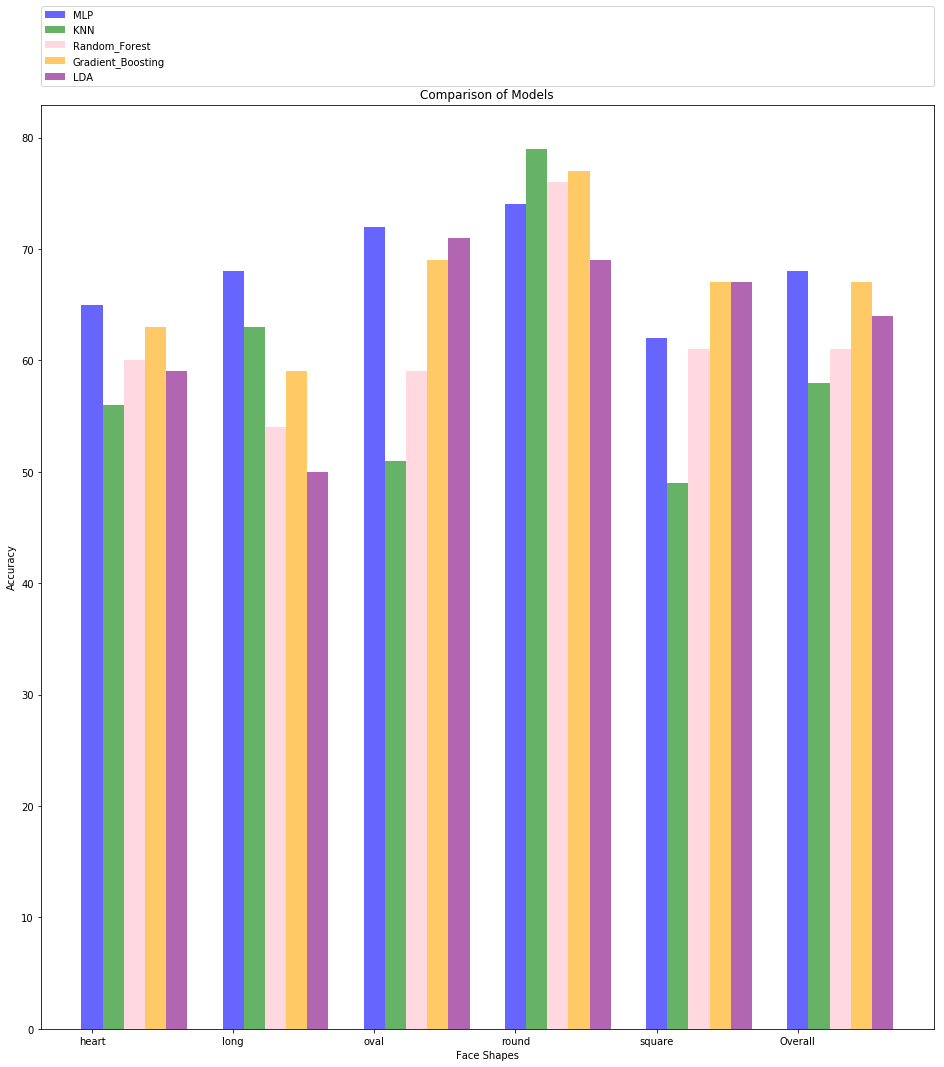

In [15]:
%run -i model_comparisons.py

### Why I chose this set of models:

I chose KNN because one of its most attractive features is that is simple to understand and easy to implement, especially for multi-class problems, Also KNN is also a very flexible model and does not require a certain underlying distribution of the data. After a few runs, KNN tends to perform the worst of my models.

In case of a Random Forest Classifier (Ensemble predictor), It would be useful to form a strong model using the learnings from weaker models.  A disadvantage of the RF model is that it can overfit the data, as you will observe here. I attempted to tune the hyperparameters to help the model ignore some of the noise/over-fitting in the small sample size (by changing the leaf size).  The RFC performs fast (even with hundreds of iterations) which makes it a good choice as well.

In each iteration of RFC, the classifiers are trained independently.  However, with Gradient Boosting, it builds on weak classifiers so that the next classifier is trained to improve the already trained ones.  This may explain why GB performs better than RFC. The GB model took the longest to run with certain hyperparameters were chosen.

I also tried Linear Discriminant Analysis to compare the performance of a linear model. LDA makes predictions by estimating each probability that each input belongs to each class. The class that gets the highest probability is the output class and a prediction is made for that input. 
LDA Limitations:
* It requires normalized data with the same variance (which I provided).
* It can be impacted by outlier data, which exists in my dataset so may have impacted performance here.

Finally, I used a neural network because they are powerful and flexible with the ability to capture nonlinear and complex underlying characteristics of a dataset with a high degree of accuracy.  Neural networks boost to feed the results from one part of the model into the next part, allowing it to learn more as data flows through the layers.  The disadvantage is that because NN require large datasets, the model I built has an overfitting problem.  

### Hyperparameters I tried 
#### MLP
Hidden_Layer_Sizes: This is the most important hyperparameter so I used an iterative approach within the solver to find the best number and size of layers. Fine tuning the layers led to better and better results.

* max_iter: 100 - I tried 100, 200, 500 and it always selected 100 so I locked that down to save time later.

* learning_rate_init: 0.01 (any smaller and the model would not converge)

#### KNN
For the KNN Model, I tuned the hyperparameters of K and the weighting.  Because goal is to classify the samples correctly, I calculated the misclassification error (MSE) for each K.  I determined K=4 was best through this process. But, When I changed the default weighting from uniform to weighting by distance, it led to overfitting. 

#### RF

I tuned the RF model using the accuracy score and cross validation scores and mean. There are an unlimited number of combinations so I tried to focus on the hyperparameters most relevant to the dataset and the model to build.

min_samples_leaf - way overfit because it allows leaf size to be 1; A smaller leaf makes the model more prone to capturing noise in training data.  At default (1), there was significant overfitting; as I increased min_samples_leaf, the scores for both train and test decreased, but for training, there was more decline, reducing overfitting.

* n_estimators (The number of trees in the forest.) - higher # takes longer but makes predictions stronger and more stable.

* max depth - The maximum depth of the tree. As None, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

* min_samples_split - I set to 15 (default is 2) to try to reduce noise from small sample size. At 2, the model was significantly overfit; at 15, less so.

* max_features: max # of features a tree can use - the best model recommended sqrt (square root of the total number of features in individual run)

#### Gradient Boosting
GB models are similar to random forest in terms of the definition of the hyperparameters. There are more hyperparameters to choose when you use GB.

* n_estimators: higher # takes longer but makes predictions stronger and more stable. Picked 300.

* max_depth: max dept of a tree; used to control over-fitting as higher dept will allow the model to learn specifics relations for a particular sample; randome search for "best" model chose 15.

* min_samples_leaf: increasing from default of 1 to 20 increased accuracy again by forcing the model not to overfit so each sample had its own leaf

* min_samples_split: worked best at 2 (default)

#### LDA

This model ran a lot more quickly so I used a grid search to find the "best" model.  I had to split the grid search to solvers that allowed shrinkage (lsqr, eigen) and the svd solver which does not.  

* SVD Solver:
* n_components: the "best" model had 1 component
* tol = 0.1

This model had the same performance as the other option with eigen or lsqr solvers (with shrinkage). I tuned the n_components (also 1) and shrinkage (auto was the best).

To evaluate each model, I calculated the recall for each face shape as well as the overall model. I chose MLP neural network model because it performed the best in 4 out of 5 shape classifications and overall. I also believe this model will continue to improve performance as more images are added, which will allow the application to scale efficiently.  The Gradient Boosting model  performed similarly to the MLP however, it is a much slower model to run.

The neural network model performed well but I know it would be a much better model with many more input images and celebrities.  All of the models had over-fitting, likely because of the use of the same celebrity in many images.

## Supervised Learning - the chosen model

### Set up Test/Train for supervised learning

In [16]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import ensemble
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA 

In [17]:
data_clean = data.dropna(axis=0, how='any')
X = data_clean
X = X.drop(['filenum','filename','classified_shape'] , axis = 1)
X_norm = normalize(X)
Y = data_clean['classified_shape']

### Standardize features by removing the mean and scaling to unit variance

In [18]:
scaler = StandardScaler()  
scaler.fit(X)  

X = scaler.transform(X)

### Split into train/test sets

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y,
    test_size=0.25,
    random_state=1200)

### Apply PCA for dimension reduction

In [20]:
n_components = 18
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [21]:
# #Remove PCA 
X_train_pca = X_train
X_test_pca = X_test

## Neural Network (MLP)

In [22]:
from sklearn.neural_network import MLPClassifier

In [28]:
import itertools

mlp = MLPClassifier(hidden_layer_sizes=(60,10,60,30), solver='sgd',shuffle  = True, 
                    learning_rate_init=0.01, max_iter = 200,warm_start  = False)

from sklearn.model_selection import RandomizedSearchCV 
param_grid = { 
    'learning_rate_init':[0.01]   # always the best
    ,'hidden_layer_sizes': [x for x in itertools.product((10,20,30,40,50,60,100),repeat=4)]
    ,'max_iter': [100] # always the best
    ,'random_state': [525]
}

random_search = RandomizedSearchCV(estimator=mlp, param_distributions=param_grid, cv= 5, n_iter = 50, iid = True)
random_search.fit(X_train_pca, Y_train)
print(random_search.best_estimator_)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 30, 50, 10), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=525, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [23]:
# With best model tuning

best_mlp = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 100, 30, 100), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=525,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
best_mlp.fit(X_train_pca, Y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60, 100, 30, 100), learning_rate='constant',
       learning_rate_init=0.01, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=525, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [24]:
print(best_mlp.score(X_train_pca, Y_train))
mlp_score = best_mlp.score(X_test_pca,Y_test)
print(mlp_score)

1.0
0.6835106382978723


In [25]:
y_pred = best_mlp.predict(X_test_pca)
 
mlp_crosstab = pd.crosstab(Y_test, y_pred, margins=True)
mlp_crosstab

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

       heart       0.69      0.65      0.67        75
        long       0.75      0.68      0.71        68
        oval       0.60      0.72      0.65        99
       round       0.71      0.74      0.72        62
      square       0.74      0.62      0.68        72

   micro avg       0.68      0.68      0.68       376
   macro avg       0.70      0.68      0.69       376
weighted avg       0.69      0.68      0.68       376



# Run Example:

This section is the implementation of the model itself on a new image.  Select a photo and start the process below.

In [26]:
my_photo = 'data/pics/heart/amanda seyfried 10.jpg'
file_num = 2035
make_face_df_save(my_photo,file_num,df)

In [27]:
#scaler = StandardScaler()  
dfc = df
test_row = dfc.ix[file_num].values.reshape(1,-1)
test_row = scaler.transform(test_row)  
test_shape = best_mlp.predict(test_row)
print(test_shape)

['heart']


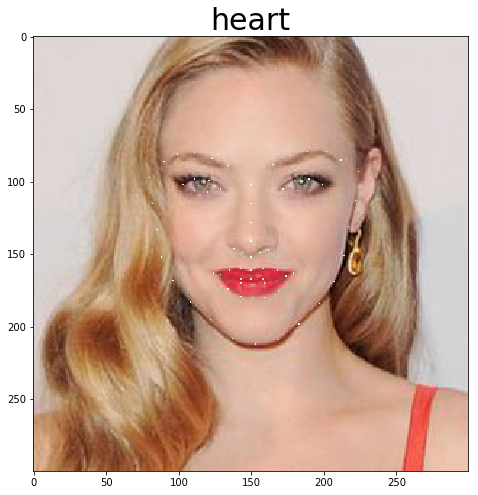

In [28]:
plt.figure(figsize = (8,8))
new_photo = my_photo+'_NEW_rotated_pts.jpg'
img = Image.open(new_photo)
draw = ImageDraw.Draw(img)
plt.title(test_shape[0], fontsize = 30)
plt.imshow(img)
img.close()

In [29]:
dfc.head()

,0,1,2,3,4,5,6,7,8,9,...,A14,A15,A16,Width,Height,H_W_Ratio,Jaw_width,J_F_Ratio,MJ_width,MJ_J_width
2035,80.0,97.0,82.0,115.0,85.0,133.0,88.0,152.0,96.0,168.0,...,38.313091,34.875328,30.821936,144.055545,194.092761,1.347347,61.073726,0.42396,111.004504,1.817549


# Recommender

The recommender python file below contains the code for the recommender which uses as inputs: the face shape classified above, the user's desire for an up-do or not and their hair length.

It returns 6 images of hair styles recommended for their face shape.  The original selection is based on a random number score. However, the user can then provide feedback to the system that indicates their top and bottom preference.  This preference iterates back into the score by adding or removing points from the score.  If the user liked the style, this will increase the priority of the style for the next user and the opposite is true for the user's least favorite style.  This is a rudimentary system but utilized as a basic concept.

The recommender images are a subset of the images I used to train the model.  I reduced to a subset to remove having too many of the same hairstyles, especially from the same celebrity as well as very outdated hair style.

In [1]:
%run -i recommender.py

In [2]:
run_recommender(test_shape[0])

NameError: name 'test_shape' is not defined

In [ ]:
run_recommender(test_shape[0])